<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.589669,39.737479,-0.005357,96.321791,96.326719,-0.004927
1,0.0,1.0,78.828887,98.516300,0.001684,187.346871,187.345923,0.000948
2,0.0,2.0,81.179844,48.156976,-0.010074,139.326746,139.337384,-0.010639
3,0.0,3.0,52.718845,44.897917,0.000330,107.617091,107.616525,0.000566
4,0.0,4.0,72.343451,86.086940,-0.001009,168.429383,168.430890,-0.001507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.043522,34.524993,0.001617,72.570132,72.566944,0.003187
119996,999.0,116.0,91.480348,97.335752,0.000119,198.816218,198.816599,-0.000380
119997,999.0,117.0,96.495985,60.802762,-0.001583,167.297164,167.298441,-0.001277
119998,999.0,118.0,37.747740,54.267487,0.002267,102.017494,102.014209,0.003285


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.589669,39.737479,-0.005357,96.321791,96.326719,-0.004927
1,0.0,1.0,78.828887,98.516300,0.001684,187.346871,187.345923,0.000948
2,0.0,2.0,81.179844,48.156976,-0.010074,139.326746,139.337384,-0.010639
3,0.0,3.0,52.718845,44.897917,0.000330,107.617091,107.616525,0.000566
4,0.0,4.0,72.343451,86.086940,-0.001009,168.429383,168.430890,-0.001507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.043522,34.524993,0.001617,72.570132,72.566944,0.003187
119996,999.0,116.0,91.480348,97.335752,0.000119,198.816218,198.816599,-0.000380
119997,999.0,117.0,96.495985,60.802762,-0.001583,167.297164,167.298441,-0.001277
119998,999.0,118.0,37.747740,54.267487,0.002267,102.017494,102.014209,0.003285


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.589669  39.737479 -0.005357   96.321791   96.326719 -0.004927
      1.0    78.828887  98.516300  0.001684  187.346871  187.345923  0.000948
      2.0    81.179844  48.156976 -0.010074  139.326746  139.337384 -0.010639
      3.0    52.718845  44.897917  0.000330  107.617091  107.616525  0.000566
      4.0    72.343451  86.086940 -0.001009  168.429383  168.430890 -0.001507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.043522  34.524993  0.001617   72.570132   72.566944  0.003187
      116.0  91.480348  97.335752  0.000119  198.816218  198.816599 -0.000380
      117.0  96.495985  60.802762 -0.001583  167.297164  167.298441 -0.001277
      118.0  37.747740  54.267487  0.002267  102.017494  102.014209  0.003285
      119.0  81.867644  47.193310 -0.004378  139.056576  139.060191 -0.003615

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.589669  39.737479 -0.005357   96.321791   96.326719 -0.004927
      1.0    78.828887  98.516300  0.001684  187.346871  187.345923  0.000948
      2.0    81.179844  48.156976 -0.010074  139.326746  139.337384 -0.010639
      3.0    52.718845  44.897917  0.000330  107.617091  107.616525  0.000566
      4.0    72.343451  86.086940 -0.001009  168.429383  168.430890 -0.001507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.043522  34.524993  0.001617   72.570132   72.566944  0.003187
      116.0  91.480348  97.335752  0.000119  198.816218  198.816599 -0.000380
      117.0  96.495985  60.802762 -0.001583  167.297164  167.298441 -0.001277
      118.0  37.747740  54.267487  0.002267  102.017494  102.014209  0.003285
      119.0  81.867644  47.193310 -0.004378  139.056576  139.060191 -0.003615

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.589669,39.737479,-0.005357,96.321791,96.326719,-0.004927
1,0.0,1.0,78.828887,98.516300,0.001684,187.346871,187.345923,0.000948
2,0.0,2.0,81.179844,48.156976,-0.010074,139.326746,139.337384,-0.010639
3,0.0,3.0,52.718845,44.897917,0.000330,107.617091,107.616525,0.000566
4,0.0,4.0,72.343451,86.086940,-0.001009,168.429383,168.430890,-0.001507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,28.043522,34.524993,0.001617,72.570132,72.566944,0.003187
119996,999.0,116.0,91.480348,97.335752,0.000119,198.816218,198.816599,-0.000380
119997,999.0,117.0,96.495985,60.802762,-0.001583,167.297164,167.298441,-0.001277
119998,999.0,118.0,37.747740,54.267487,0.002267,102.017494,102.014209,0.003285


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    46.589669  39.737479 -0.005357   96.321791   96.326719 -0.004927
      1.0    78.828887  98.516300  0.001684  187.346871  187.345923  0.000948
      2.0    81.179844  48.156976 -0.010074  139.326746  139.337384 -0.010639
      3.0    52.718845  44.897917  0.000330  107.617091  107.616525  0.000566
      4.0    72.343451  86.086940 -0.001009  168.429383  168.430890 -0.001507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  28.043522  34.524993  0.001617   72.570132   72.566944  0.003187
      116.0  91.480348  97.335752  0.000119  198.816218  198.816599 -0.000380
      117.0  96.495985  60.802762 -0.001583  167.297164  167.298441 -0.001277
      118.0  37.747740  54.267487  0.002267  102.017494  102.014209  0.003285
      119.0  81.867644  47.193310 -0.004378  139.056576  139.060191 -0.003615

[120000 rows x 6 columns]

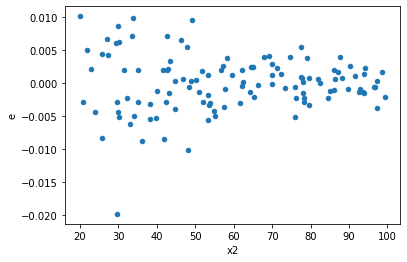

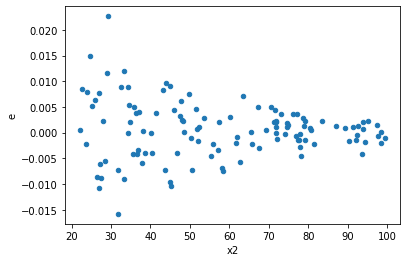

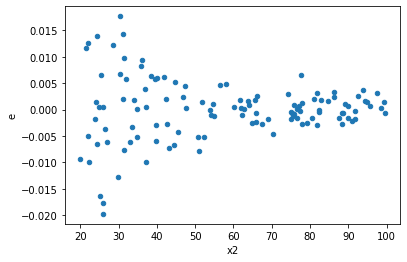

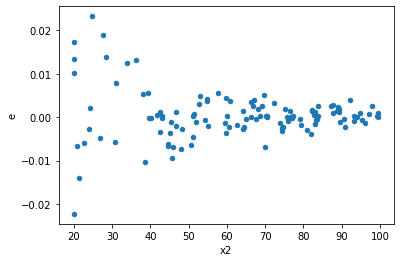

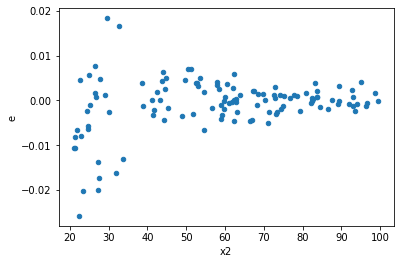

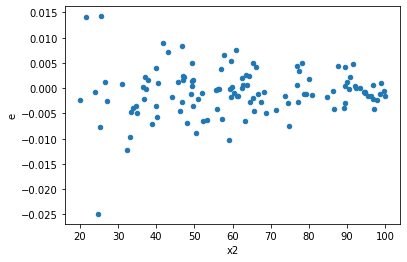

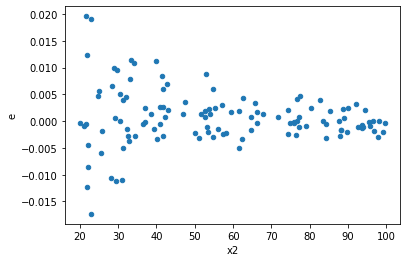

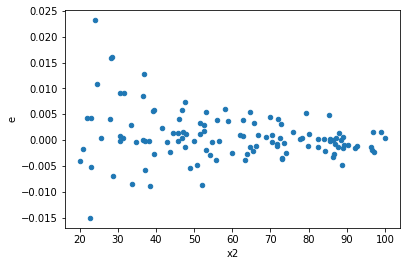

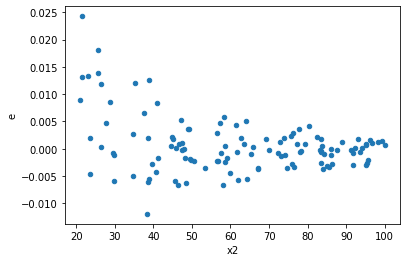

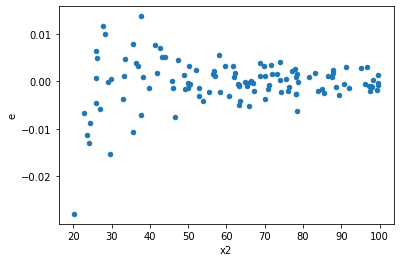

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.0012002169195688707,0.00046364477074377,2.609167216454067e-05,1.0079234146603696e-05,0.38630081211512635,0.0016285871079277112,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.002487901243635079,0.0004482246464828892,5.4084809644240844e-05,9.744014053975852e-06,0.1801617518499195,4.320086194900698e-08,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.0025275416702429023,0.00040761640398245667,5.4946558048758745e-05,8.861226173531667e-06,0.16126990458016222,6.850839263836792e-09,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.0031169826928939383,0.00027234327685547006,6.776049332378127e-05,5.920506018597175e-06,0.08737400996045154,9.25351806777441e-14,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.002207239405151774,0.00032303727533219024,4.798346532938639e-05,7.022549463743266e-06,0.14635352856523398,1.2949163018351924e-09,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.0014937375478731051,0.0004123198866738797,3.2472555388545765e-05,8.963475797258254e-06,0.2760323507037575,2.6108622382548695e-05,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.0023732608191119726,0.00028594814584136146,5.1592626502434183e-05,6.216264040029597e-06,0.12048745065801814,4.0198812815134414e-11,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.0019788499933830884,0.00029012926326566814,4.301847811702366e-05,6.307157897079742e-06,0.14661508665932596,1.3357822506139696e-09,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.0018223708959731431,0.00034403635771763035,3.961675860811181e-05,7.479051254731094e-06,0.1887850373806126,9.208774206006508e-08,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    990
Reject001=1 : Homoscedasticity       10
Name: Result_test, dtype: int64